In [12]:
import pandas as pd
dataset=pd.read_csv('./export/dataset.csv',index_col=0)

In [29]:
import pandas as pd
from scipy.stats import skew, kurtosis

# 读取csv文件并转换为DataFrame对象
df = dataset

# 将日期列转换为datetime类型
df['日期'] = pd.to_datetime(df['日期'])

# 按分类名称和日期对数据进行分组，并计算每个组的销售总量
grouped = df.groupby(['分类名称', '日期'])['销量(千克)'].sum()

# 将分组结果转换为DataFrame对象
result = grouped.reset_index()

# 按分类名称分组，并计算每个分类名称下每日总销量的平均值、标准差、最大值、最小值、偏度、峰度、样本数和变异系数
stats = result.groupby('分类名称')['销量(千克)'].agg(['mean', 'std', 'max', 'min', 'skew', kurtosis, 'count', 'mad'])

# 将所有分类名称的统计结果汇总成表
summary = pd.concat([stats], axis=1)
summary.columns=['平均值','标准差','最大值','最小值','偏度','峰度','样本数','变异系数']

# 打印汇总表
display(summary)

,平均值,标准差,最大值,最小值,偏度,峰度,样本数,变异系数
分类名称,,,,,,,,
水生根茎类,37.402169,31.357190,296.792,0.926,2.507966,12.100591,1085,22.468119
花叶类,182.968643,86.199230,1265.473,31.298,2.901297,26.090021,1085,61.025380
花菜类,38.529936,22.675177,186.155,0.632,1.527719,4.180610,1084,16.906247
茄类,21.363602,13.158840,118.931,0.252,1.738417,5.856211,1050,9.697166
辣椒类,84.413483,53.436029,604.231,6.066,3.146177,18.330187,1085,35.668830
食用菌,70.126014,48.489888,511.136,3.012,2.996382,16.813127,1085,33.272913


In [30]:
import pandas as pd
from scipy.stats import skew, kurtosis

# 读取csv文件并转换为DataFrame对象
df = dataset

# 将日期列转换为datetime类型
df['日期'] = pd.to_datetime(df['日期'])

# 按分类名称和日期对数据进行分组，并计算每个组的销售总量
grouped = df.groupby(['单品名称', '日期'])['销量(千克)'].sum()

# 将分组结果转换为DataFrame对象
result = grouped.reset_index()

# 按分类名称分组，并计算每个分类名称下每日总销量的平均值、标准差、最大值、最小值、偏度、峰度、样本数和变异系数
stats = result.groupby('单品名称')['销量(千克)'].agg(['mean', 'std', 'max', 'min', 'skew', kurtosis, 'count', 'mad'])

# 将所有分类名称的统计结果汇总成表
summary = pd.concat([stats], axis=1)
summary.columns=['平均值','标准差','最大值','最小值','偏度','峰度','样本数','变异系数']

# 打印汇总表
display(summary)

d:\anaconda3\lib\site-packages\pandas\core\groupby\groupby.py:1476: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  f = lambda x: func(x, *args, **kwargs)


,平均值,标准差,最大值,最小值,偏度,峰度,样本数,变异系数
单品名称,,,,,,,,
七彩椒(1),0.926732,1.407996,16.094,0.100,7.059166,62.269815,284,0.664775
七彩椒(2),1.434236,1.055215,5.841,0.129,1.290455,1.864880,258,0.823329
七彩椒(份),1.800000,0.918937,4.000,1.000,1.546410,1.340720,10,0.640000
上海青,8.277210,6.889793,43.597,0.138,1.917583,4.607269,919,5.079696
上海青(份),10.696864,10.211509,118.000,1.000,4.690233,41.374629,287,6.629363
...,...,...,...,...,...,...,...,...
黑牛肝菌,0.361333,0.239602,0.638,0.222,1.731915,-1.500000,3,0.184444
黑牛肝菌(盒),1.333333,0.577350,2.000,1.000,1.732051,-1.500000,3,0.444444
黑皮鸡枞菌,0.362187,0.256337,1.104,0.164,1.889070,2.342327,16,0.193883


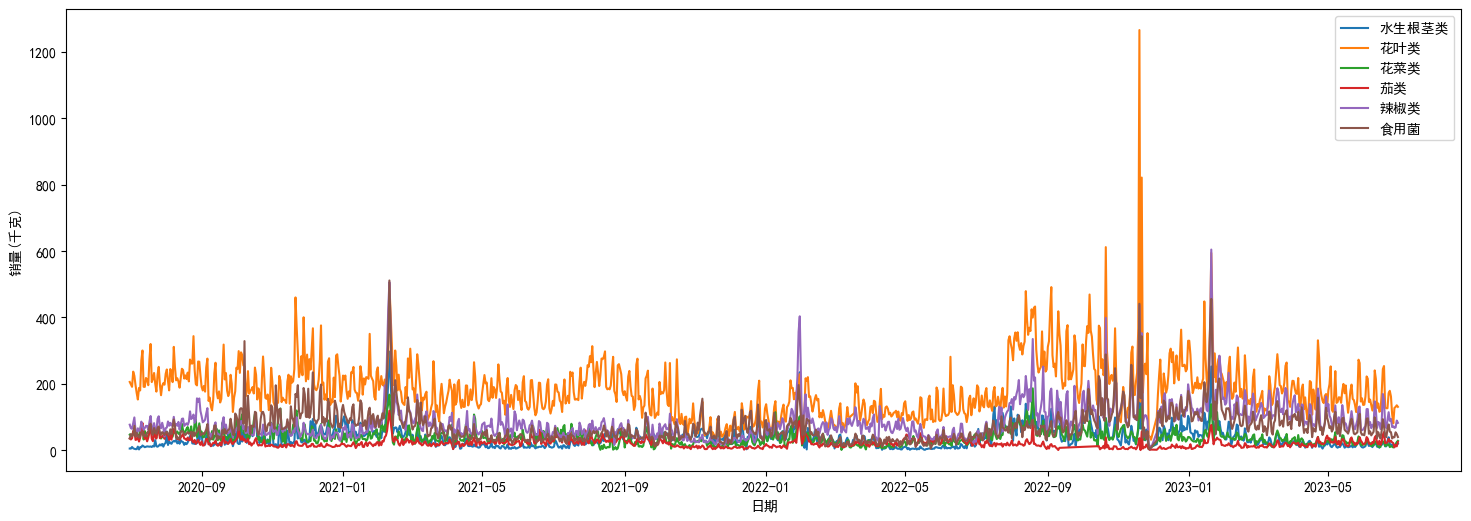

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

# 读取csv文件并转换为DataFrame对象
df = dataset
# 将日期列转换为datetime类型
df['日期'] = pd.to_datetime(df['日期'])

# 按分类名称和日期对数据进行分组，并计算每个组的销售总量
grouped = df.groupby(['分类名称', '日期'])['销量(千克)'].sum()

# 将分组结果转换为DataFrame对象
result = grouped.reset_index()

# 绘制折线图
plt.figure(figsize=(18,6))
for name, group in result.groupby('分类名称'):
    plt.plot(group['日期'], group['销量(千克)'], label=name)
plt.legend()
plt.xlabel('日期')
plt.ylabel('销量(千克)')
plt.show()

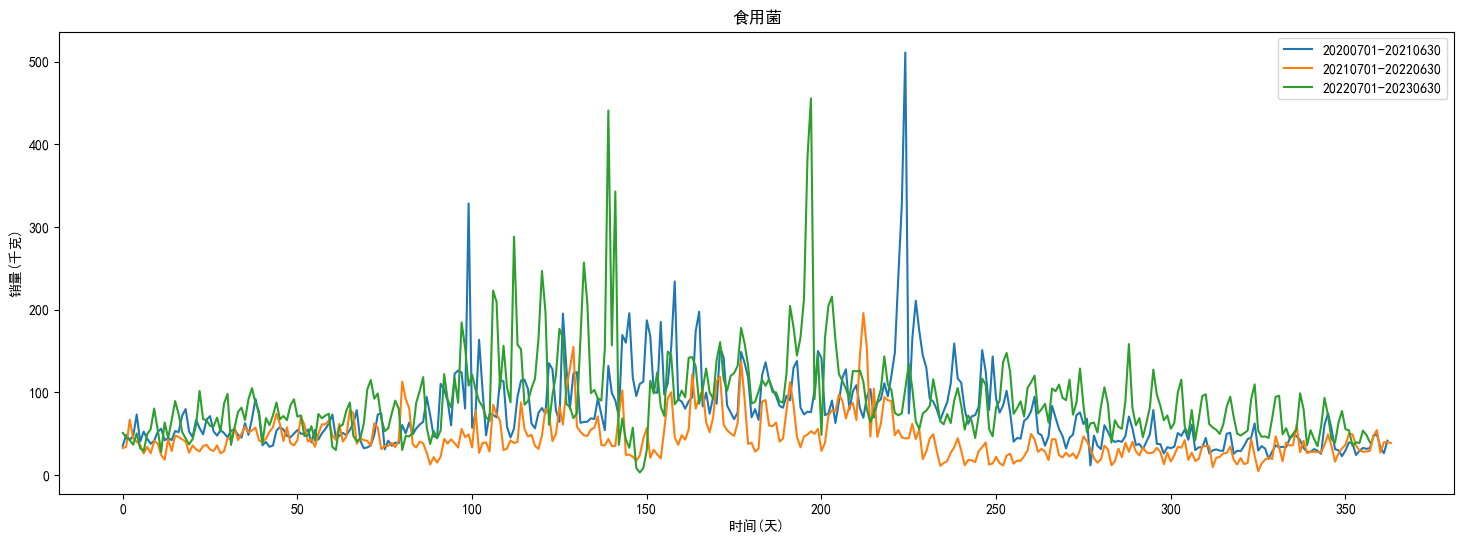

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
warnings.filterwarnings("ignore")

mpl.rcParams['font.family']='SimHei'
plt.rcParams['axes.unicode_minus']=False

# 读取csv文件并转换为DataFrame对象
df = dataset
# 将日期列转换为datetime类型
df['日期'] = pd.to_datetime(df['日期'])

# 筛选出指定品类的数据
category = '食用菌'
df_category = df.query('分类名称 == @category')

# 按年份和日期对数据进行分组，并计算每个组的销售总量
result = pd.DataFrame(df_category.groupby([df_category['日期'].dt.date])['销量(千克)'].sum())


res1=(result.loc[pd.to_datetime('2020-07-01'):pd.to_datetime('2021-06-30')].reset_index())[['销量(千克)']]
res2=(result.loc[pd.to_datetime('2021-07-01'):pd.to_datetime('2022-06-30')].reset_index())[['销量(千克)']]
res3=(result.loc[pd.to_datetime('2022-07-01'):pd.to_datetime('2023-06-30')].reset_index())[['销量(千克)']]


# 绘制折线图
plt.figure(figsize=(18,6))
plt.plot(res1)
plt.plot(res2)
plt.plot(res3)
plt.title(category)
plt.xlabel('时间(天)')
plt.ylabel('销量(千克)')
plt.legend(['20200701-20210630','20210701-20220630','20220701-20230630'])
plt.show()

In [58]:
pd.__version__

'1.4.4'

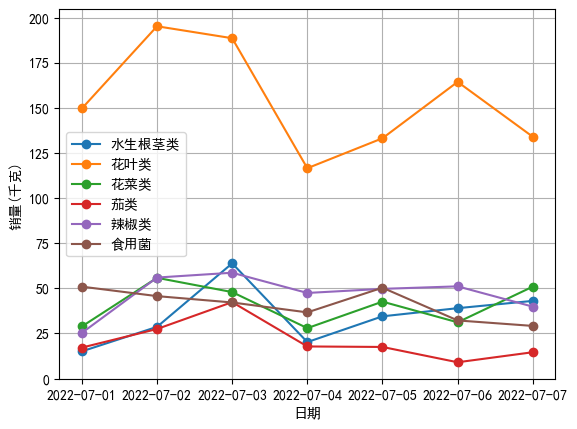

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取csv文件并转换为DataFrame对象
df = dataset

# 将日期列转换为datetime类型
df['日期'] = pd.to_datetime(df['日期'])

# 筛选出每年7月1日到7月7日的数据
mask = ((df['日期'].dt.month == 7) & (df['日期'].dt.day >= 1) 
        & (df['日期'].dt.day <= 7) & (df['日期'].dt.year ==2022))
df = df.loc[mask]

# 按分类名称和日期对数据进行分组，并计算每个组的销售总量
grouped = df.groupby(['分类名称', '日期'])['销量(千克)'].sum()

# 将分组结果转换为DataFrame对象
result = grouped.reset_index()

# 绘制折线图
for name, group in result.groupby('分类名称'):
    plt.plot(group['日期'], group['销量(千克)'], label=name,marker='o')

plt.legend()
plt.grid()
plt.xlabel('日期')
plt.ylabel('销量(千克)')
plt.show()